Import required libraries: 

In [1]:
import os
import sys
sys.path.insert(0, os.path.join(os.getcwd(), ".."))

import numpy as np
import matplotlib.pyplot as plt 

from pylab import rcParams
rcParams['figure.figsize'] = 20, 16
rcParams['figure.dpi'] = 300

import torch
from torch import nn
from torch import distributions
from torch.nn.parameter import Parameter

from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler

%load_ext autoreload
%autoreload 2

Import our own libraries: 

In [2]:
from project.training.train import train as train
import project.utils as utils
import project.networks.net as net

Define our architecture:

In [4]:
nets = lambda: nn.Sequential(nn.Linear(2, 256), nn.LeakyReLU(), nn.Linear(256, 256), nn.LeakyReLU(), nn.Linear(256, 2), nn.Tanh()) # net s
nett = lambda: nn.Sequential(nn.Linear(2, 256), nn.LeakyReLU(), nn.Linear(256, 256), nn.LeakyReLU(), nn.Linear(256, 2)) # net t
masks = torch.from_numpy(np.array([[0, 1], [1, 0]] * 3).astype(np.float32)) # 6x2 matrix. len(masks) = 6 = num subblocks.
prior = distributions.MultivariateNormal(torch.zeros(2), torch.eye(2))      # so we have a total of 3 neural blocks (see fig. 1 of boltzmann generators paper)
model = net.RealNVP(nets, nett, masks, prior)

Either train the model or load the pre-trained version:

In [17]:
train(model)

Loading the datasets...
- done.
Starting training for 200 epoch(s)
Epoch 1/200
100%|██████████| 16/16 [00:00<00:00, 44.03it/s, loss=0.480]
- Train metrics: accuracy: 0.531 ; loss: 0.398
- Eval metrics : accuracy: 0.457 ; loss: 0.569
- Found new best accuracy
Epoch 2/200
 38%|███▊      | 6/16 [00:00<00:00, 44.73it/s, loss=0.455]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.79it/s, loss=0.438]
- Train metrics: accuracy: 0.391 ; loss: 0.477
- Eval metrics : accuracy: 0.447 ; loss: 0.439
Epoch 3/200
 44%|████▍     | 7/16 [00:00<00:00, 46.30it/s, loss=0.390]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.30it/s, loss=0.400]
- Train metrics: accuracy: 0.469 ; loss: 0.282
- Eval metrics : accuracy: 0.405 ; loss: 0.428
Epoch 4/200
 44%|████▍     | 7/16 [00:00<00:00, 46.71it/s, loss=0.423]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.34it/s, loss=0.381]
- Train metrics: accuracy: 0.562 ; loss: 0.584
- Eval metrics : accuracy: 0.433 ; loss: 0.431
Epoch 5/200
 44%|████▍     | 7/16 [00:00<00:00, 46.86it/s, loss=0.384]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.93it/s, loss=0.412]
- Train metrics: accuracy: 0.500 ; loss: 0.457
- Eval metrics : accuracy: 0.431 ; loss: 0.502
Epoch 6/200
 44%|████▍     | 7/16 [00:00<00:00, 46.25it/s, loss=0.505]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.07it/s, loss=0.465]
- Train metrics: accuracy: 0.531 ; loss: 0.240
- Eval metrics : accuracy: 0.439 ; loss: 0.524
Epoch 7/200
 44%|████▍     | 7/16 [00:00<00:00, 45.23it/s, loss=0.403]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.70it/s, loss=0.432]
- Train metrics: accuracy: 0.547 ; loss: 0.338
- Eval metrics : accuracy: 0.463 ; loss: 0.468
- Found new best accuracy
Epoch 8/200
 38%|███▊      | 6/16 [00:00<00:00, 41.73it/s, loss=0.433]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.98it/s, loss=0.431]
- Train metrics: accuracy: 0.562 ; loss: 0.657
- Eval metrics : accuracy: 0.421 ; loss: 0.422
Epoch 9/200
 44%|████▍     | 7/16 [00:00<00:00, 46.06it/s, loss=0.396]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.33it/s, loss=0.382]
- Train metrics: accuracy: 0.609 ; loss: 0.324
- Eval metrics : accuracy: 0.449 ; loss: 0.534
Epoch 10/200
 44%|████▍     | 7/16 [00:00<00:00, 46.60it/s, loss=0.357]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.62it/s, loss=0.390]
- Train metrics: accuracy: 0.453 ; loss: 0.425
- Eval metrics : accuracy: 0.421 ; loss: 0.462
Epoch 11/200
 44%|████▍     | 7/16 [00:00<00:00, 47.21it/s, loss=0.361]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.55it/s, loss=0.384]
- Train metrics: accuracy: 0.484 ; loss: 0.221
- Eval metrics : accuracy: 0.431 ; loss: 0.480
Epoch 12/200
 44%|████▍     | 7/16 [00:00<00:00, 45.84it/s, loss=0.359]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.91it/s, loss=0.357]
- Train metrics: accuracy: 0.484 ; loss: 0.333
- Eval metrics : accuracy: 0.429 ; loss: 0.441
Epoch 13/200
 44%|████▍     | 7/16 [00:00<00:00, 46.44it/s, loss=0.377]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.16it/s, loss=0.366]
- Train metrics: accuracy: 0.516 ; loss: 0.512
- Eval metrics : accuracy: 0.459 ; loss: 0.494
Epoch 14/200
 50%|█████     | 8/16 [00:00<00:00, 48.42it/s, loss=0.392]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.75it/s, loss=0.404]
- Train metrics: accuracy: 0.484 ; loss: 0.277
- Eval metrics : accuracy: 0.473 ; loss: 0.483
- Found new best accuracy
Epoch 15/200
 44%|████▍     | 7/16 [00:00<00:00, 47.29it/s, loss=0.372]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 49.37it/s, loss=0.382]
- Train metrics: accuracy: 0.484 ; loss: 0.319
- Eval metrics : accuracy: 0.397 ; loss: 0.545
Epoch 16/200
 50%|█████     | 8/16 [00:00<00:00, 48.63it/s, loss=0.368]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 49.37it/s, loss=0.398]
- Train metrics: accuracy: 0.562 ; loss: 0.194
- Eval metrics : accuracy: 0.467 ; loss: 0.440
Epoch 17/200
 50%|█████     | 8/16 [00:00<00:00, 47.66it/s, loss=0.365]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.50it/s, loss=0.399]
- Train metrics: accuracy: 0.453 ; loss: 0.249
- Eval metrics : accuracy: 0.441 ; loss: 0.450
Epoch 18/200
 44%|████▍     | 7/16 [00:00<00:00, 44.96it/s, loss=0.417]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.65it/s, loss=0.398]
- Train metrics: accuracy: 0.578 ; loss: 0.586
- Eval metrics : accuracy: 0.419 ; loss: 0.511
Epoch 19/200
 44%|████▍     | 7/16 [00:00<00:00, 45.46it/s, loss=0.394]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.60it/s, loss=0.383]
- Train metrics: accuracy: 0.469 ; loss: 0.469
- Eval metrics : accuracy: 0.449 ; loss: 0.457
Epoch 20/200
 44%|████▍     | 7/16 [00:00<00:00, 46.27it/s, loss=0.330]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.99it/s, loss=0.377]
- Train metrics: accuracy: 0.484 ; loss: 0.254
- Eval metrics : accuracy: 0.433 ; loss: 0.440
Epoch 21/200
 50%|█████     | 8/16 [00:00<00:00, 48.01it/s, loss=0.427]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 50.16it/s, loss=0.424]
- Train metrics: accuracy: 0.484 ; loss: 0.440
- Eval metrics : accuracy: 0.451 ; loss: 0.466
Epoch 22/200
 50%|█████     | 8/16 [00:00<00:00, 48.00it/s, loss=0.364]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 49.28it/s, loss=0.437]
- Train metrics: accuracy: 0.516 ; loss: 0.349
- Eval metrics : accuracy: 0.472 ; loss: 0.463
Epoch 23/200
 44%|████▍     | 7/16 [00:00<00:00, 48.57it/s, loss=0.396]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.50it/s, loss=0.384]
- Train metrics: accuracy: 0.500 ; loss: 0.508
- Eval metrics : accuracy: 0.424 ; loss: 0.477
Epoch 24/200
 50%|█████     | 8/16 [00:00<00:00, 48.85it/s, loss=0.396]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 49.55it/s, loss=0.378]
- Train metrics: accuracy: 0.516 ; loss: 0.259
- Eval metrics : accuracy: 0.453 ; loss: 0.526
Epoch 25/200
 50%|█████     | 8/16 [00:00<00:00, 48.40it/s, loss=0.375]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 49.48it/s, loss=0.368]
- Train metrics: accuracy: 0.422 ; loss: 0.390
- Eval metrics : accuracy: 0.451 ; loss: 0.501
Epoch 26/200
 44%|████▍     | 7/16 [00:00<00:00, 46.25it/s, loss=0.375]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 49.37it/s, loss=0.385]
- Train metrics: accuracy: 0.422 ; loss: 0.375
- Eval metrics : accuracy: 0.481 ; loss: 0.484
- Found new best accuracy
Epoch 27/200
 44%|████▍     | 7/16 [00:00<00:00, 46.03it/s, loss=0.405]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.05it/s, loss=0.398]
- Train metrics: accuracy: 0.469 ; loss: 0.431
- Eval metrics : accuracy: 0.455 ; loss: 0.522
Epoch 28/200
 50%|█████     | 8/16 [00:00<00:00, 47.95it/s, loss=0.415]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 49.71it/s, loss=0.403]
- Train metrics: accuracy: 0.453 ; loss: 0.357
- Eval metrics : accuracy: 0.460 ; loss: 0.466
Epoch 29/200
 44%|████▍     | 7/16 [00:00<00:00, 46.44it/s, loss=0.362]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 49.62it/s, loss=0.387]
- Train metrics: accuracy: 0.625 ; loss: 0.321
- Eval metrics : accuracy: 0.483 ; loss: 0.471
- Found new best accuracy
Epoch 30/200
 44%|████▍     | 7/16 [00:00<00:00, 44.76it/s, loss=0.401]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.26it/s, loss=0.372]
- Train metrics: accuracy: 0.359 ; loss: 0.472
- Eval metrics : accuracy: 0.438 ; loss: 0.433
Epoch 31/200
 50%|█████     | 8/16 [00:00<00:00, 48.55it/s, loss=0.369]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.43it/s, loss=0.370]
- Train metrics: accuracy: 0.531 ; loss: 0.518
- Eval metrics : accuracy: 0.463 ; loss: 0.467
Epoch 32/200
 31%|███▏      | 5/16 [00:00<00:00, 46.88it/s, loss=0.413]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.92it/s, loss=0.393]
- Train metrics: accuracy: 0.422 ; loss: 0.317
- Eval metrics : accuracy: 0.463 ; loss: 0.509
Epoch 33/200
 50%|█████     | 8/16 [00:00<00:00, 46.77it/s, loss=0.400]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.75it/s, loss=0.354]
- Train metrics: accuracy: 0.531 ; loss: 0.468
- Eval metrics : accuracy: 0.435 ; loss: 0.476
Epoch 34/200
 44%|████▍     | 7/16 [00:00<00:00, 46.74it/s, loss=0.339]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.84it/s, loss=0.360]
- Train metrics: accuracy: 0.484 ; loss: 0.504
- Eval metrics : accuracy: 0.455 ; loss: 0.502
Epoch 35/200
 50%|█████     | 8/16 [00:00<00:00, 48.41it/s, loss=0.391]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 49.74it/s, loss=0.358]
- Train metrics: accuracy: 0.484 ; loss: 0.264
- Eval metrics : accuracy: 0.429 ; loss: 0.485
Epoch 36/200
 50%|█████     | 8/16 [00:00<00:00, 48.85it/s, loss=0.382]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 49.74it/s, loss=0.363]
- Train metrics: accuracy: 0.438 ; loss: 0.461
- Eval metrics : accuracy: 0.484 ; loss: 0.497
- Found new best accuracy
Epoch 37/200
 44%|████▍     | 7/16 [00:00<00:00, 46.24it/s, loss=0.346]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.77it/s, loss=0.369]
- Train metrics: accuracy: 0.438 ; loss: 0.429
- Eval metrics : accuracy: 0.475 ; loss: 0.508
Epoch 38/200
 50%|█████     | 8/16 [00:00<00:00, 48.17it/s, loss=0.366]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.64it/s, loss=0.356]
- Train metrics: accuracy: 0.547 ; loss: 0.444
- Eval metrics : accuracy: 0.455 ; loss: 0.482
Epoch 39/200
 44%|████▍     | 7/16 [00:00<00:00, 46.36it/s, loss=0.338]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.17it/s, loss=0.343]
- Train metrics: accuracy: 0.547 ; loss: 0.440
- Eval metrics : accuracy: 0.423 ; loss: 0.536
Epoch 40/200
 50%|█████     | 8/16 [00:00<00:00, 48.62it/s, loss=0.399]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 50.30it/s, loss=0.353]
- Train metrics: accuracy: 0.531 ; loss: 0.405
- Eval metrics : accuracy: 0.439 ; loss: 0.482
Epoch 41/200
 44%|████▍     | 7/16 [00:00<00:00, 45.77it/s, loss=0.310]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.67it/s, loss=0.350]
- Train metrics: accuracy: 0.547 ; loss: 0.310
- Eval metrics : accuracy: 0.401 ; loss: 0.521
Epoch 42/200
 44%|████▍     | 7/16 [00:00<00:00, 47.35it/s, loss=0.389]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.01it/s, loss=0.365]
- Train metrics: accuracy: 0.422 ; loss: 0.510
- Eval metrics : accuracy: 0.407 ; loss: 0.502
Epoch 43/200
 44%|████▍     | 7/16 [00:00<00:00, 47.39it/s, loss=0.344]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.21it/s, loss=0.348]
- Train metrics: accuracy: 0.453 ; loss: 0.267
- Eval metrics : accuracy: 0.438 ; loss: 0.517
Epoch 44/200
 44%|████▍     | 7/16 [00:00<00:00, 46.34it/s, loss=0.371]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.21it/s, loss=0.392]
- Train metrics: accuracy: 0.516 ; loss: 0.260
- Eval metrics : accuracy: 0.409 ; loss: 0.478
Epoch 45/200
 44%|████▍     | 7/16 [00:00<00:00, 45.87it/s, loss=0.354]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.78it/s, loss=0.362]
- Train metrics: accuracy: 0.484 ; loss: 0.228
- Eval metrics : accuracy: 0.443 ; loss: 0.480
Epoch 46/200
 44%|████▍     | 7/16 [00:00<00:00, 44.20it/s, loss=0.350]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.43it/s, loss=0.360]
- Train metrics: accuracy: 0.500 ; loss: 0.243
- Eval metrics : accuracy: 0.457 ; loss: 0.520
Epoch 47/200
 44%|████▍     | 7/16 [00:00<00:00, 46.10it/s, loss=0.457]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.93it/s, loss=0.452]
- Train metrics: accuracy: 0.469 ; loss: 0.280
- Eval metrics : accuracy: 0.447 ; loss: 0.539
Epoch 48/200
 44%|████▍     | 7/16 [00:00<00:00, 44.00it/s, loss=0.433]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.00it/s, loss=0.441]
- Train metrics: accuracy: 0.469 ; loss: 0.345
- Eval metrics : accuracy: 0.458 ; loss: 0.505
Epoch 49/200
 44%|████▍     | 7/16 [00:00<00:00, 46.04it/s, loss=0.385]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.49it/s, loss=0.386]
- Train metrics: accuracy: 0.484 ; loss: 0.500
- Eval metrics : accuracy: 0.427 ; loss: 0.461
Epoch 50/200
 38%|███▊      | 6/16 [00:00<00:00, 38.93it/s, loss=0.407]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 42.08it/s, loss=0.431]
- Train metrics: accuracy: 0.422 ; loss: 0.311
- Eval metrics : accuracy: 0.449 ; loss: 0.511
Epoch 51/200
 44%|████▍     | 7/16 [00:00<00:00, 43.85it/s, loss=0.525]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 43.90it/s, loss=0.454]
- Train metrics: accuracy: 0.359 ; loss: 0.520
- Eval metrics : accuracy: 0.445 ; loss: 0.693
Epoch 52/200
 44%|████▍     | 7/16 [00:00<00:00, 44.28it/s, loss=0.444]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.54it/s, loss=0.448]
- Train metrics: accuracy: 0.562 ; loss: 0.536
- Eval metrics : accuracy: 0.465 ; loss: 0.476
Epoch 53/200
 38%|███▊      | 6/16 [00:00<00:00, 41.58it/s, loss=0.431]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 44.74it/s, loss=0.411]
- Train metrics: accuracy: 0.562 ; loss: 0.413
- Eval metrics : accuracy: 0.485 ; loss: 0.491
- Found new best accuracy
Epoch 54/200
 38%|███▊      | 6/16 [00:00<00:00, 45.01it/s, loss=0.399]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.05it/s, loss=0.376]
- Train metrics: accuracy: 0.484 ; loss: 0.472
- Eval metrics : accuracy: 0.499 ; loss: 0.522
- Found new best accuracy
Epoch 55/200
 44%|████▍     | 7/16 [00:00<00:00, 45.17it/s, loss=0.309]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.15it/s, loss=0.351]
- Train metrics: accuracy: 0.344 ; loss: 0.276
- Eval metrics : accuracy: 0.435 ; loss: 0.484
Epoch 56/200
 44%|████▍     | 7/16 [00:00<00:00, 47.13it/s, loss=0.360]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.17it/s, loss=0.341]
- Train metrics: accuracy: 0.422 ; loss: 0.261
- Eval metrics : accuracy: 0.441 ; loss: 0.534
Epoch 57/200
 44%|████▍     | 7/16 [00:00<00:00, 42.83it/s, loss=0.389]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.92it/s, loss=0.367]
- Train metrics: accuracy: 0.578 ; loss: 0.230
- Eval metrics : accuracy: 0.490 ; loss: 0.514
Epoch 58/200
 44%|████▍     | 7/16 [00:00<00:00, 46.53it/s, loss=0.359]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.60it/s, loss=0.351]
- Train metrics: accuracy: 0.547 ; loss: 0.405
- Eval metrics : accuracy: 0.423 ; loss: 0.483
Epoch 59/200
 44%|████▍     | 7/16 [00:00<00:00, 44.50it/s, loss=0.300]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.99it/s, loss=0.339]
- Train metrics: accuracy: 0.406 ; loss: 0.276
- Eval metrics : accuracy: 0.451 ; loss: 0.537
Epoch 60/200
 44%|████▍     | 7/16 [00:00<00:00, 46.78it/s, loss=0.383]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.47it/s, loss=0.342]
- Train metrics: accuracy: 0.562 ; loss: 0.303
- Eval metrics : accuracy: 0.421 ; loss: 0.507
Epoch 61/200
 44%|████▍     | 7/16 [00:00<00:00, 42.08it/s, loss=0.337]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 44.48it/s, loss=0.345]
- Train metrics: accuracy: 0.422 ; loss: 0.178
- Eval metrics : accuracy: 0.411 ; loss: 0.491
Epoch 62/200
 44%|████▍     | 7/16 [00:00<00:00, 44.43it/s, loss=0.296]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.69it/s, loss=0.375]
- Train metrics: accuracy: 0.391 ; loss: 0.154
- Eval metrics : accuracy: 0.429 ; loss: 0.515
Epoch 63/200
 44%|████▍     | 7/16 [00:00<00:00, 44.82it/s, loss=0.347]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.32it/s, loss=0.364]
- Train metrics: accuracy: 0.438 ; loss: 0.441
- Eval metrics : accuracy: 0.427 ; loss: 0.527
Epoch 64/200
 44%|████▍     | 7/16 [00:00<00:00, 44.35it/s, loss=0.365]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.18it/s, loss=0.366]
- Train metrics: accuracy: 0.516 ; loss: 0.323
- Eval metrics : accuracy: 0.418 ; loss: 0.606
Epoch 65/200
 44%|████▍     | 7/16 [00:00<00:00, 44.13it/s, loss=0.338]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.60it/s, loss=0.365]
- Train metrics: accuracy: 0.438 ; loss: 0.287
- Eval metrics : accuracy: 0.463 ; loss: 0.490
Epoch 66/200
 44%|████▍     | 7/16 [00:00<00:00, 46.23it/s, loss=0.314]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.57it/s, loss=0.346]
- Train metrics: accuracy: 0.453 ; loss: 0.195
- Eval metrics : accuracy: 0.435 ; loss: 0.507
Epoch 67/200
 44%|████▍     | 7/16 [00:00<00:00, 45.40it/s, loss=0.337]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.22it/s, loss=0.371]
- Train metrics: accuracy: 0.531 ; loss: 0.533
- Eval metrics : accuracy: 0.411 ; loss: 0.503
Epoch 68/200
 44%|████▍     | 7/16 [00:00<00:00, 46.70it/s, loss=0.353]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.31it/s, loss=0.344]
- Train metrics: accuracy: 0.547 ; loss: 0.258
- Eval metrics : accuracy: 0.481 ; loss: 0.504
Epoch 69/200
 44%|████▍     | 7/16 [00:00<00:00, 45.25it/s, loss=0.391]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.93it/s, loss=0.345]
- Train metrics: accuracy: 0.516 ; loss: 0.350
- Eval metrics : accuracy: 0.431 ; loss: 0.505
Epoch 70/200
 44%|████▍     | 7/16 [00:00<00:00, 46.88it/s, loss=0.342]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.37it/s, loss=0.367]
- Train metrics: accuracy: 0.531 ; loss: 0.287
- Eval metrics : accuracy: 0.433 ; loss: 0.500
Epoch 71/200
 44%|████▍     | 7/16 [00:00<00:00, 46.76it/s, loss=0.397]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.68it/s, loss=0.378]
- Train metrics: accuracy: 0.469 ; loss: 0.340
- Eval metrics : accuracy: 0.472 ; loss: 0.474
Epoch 72/200
 44%|████▍     | 7/16 [00:00<00:00, 46.87it/s, loss=0.387]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.76it/s, loss=0.363]
- Train metrics: accuracy: 0.484 ; loss: 0.541
- Eval metrics : accuracy: 0.417 ; loss: 0.528
Epoch 73/200
 44%|████▍     | 7/16 [00:00<00:00, 44.52it/s, loss=0.340]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.42it/s, loss=0.360]
- Train metrics: accuracy: 0.422 ; loss: 0.437
- Eval metrics : accuracy: 0.469 ; loss: 0.496
Epoch 74/200
 44%|████▍     | 7/16 [00:00<00:00, 46.64it/s, loss=0.423]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.74it/s, loss=0.397]
- Train metrics: accuracy: 0.484 ; loss: 0.423
- Eval metrics : accuracy: 0.467 ; loss: 0.471
Epoch 75/200
 44%|████▍     | 7/16 [00:00<00:00, 46.11it/s, loss=0.408]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.73it/s, loss=0.365]
- Train metrics: accuracy: 0.375 ; loss: 0.341
- Eval metrics : accuracy: 0.479 ; loss: 0.483
Epoch 76/200
 44%|████▍     | 7/16 [00:00<00:00, 46.33it/s, loss=0.337]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.83it/s, loss=0.361]
- Train metrics: accuracy: 0.578 ; loss: 0.302
- Eval metrics : accuracy: 0.481 ; loss: 0.449
Epoch 77/200
 44%|████▍     | 7/16 [00:00<00:00, 45.80it/s, loss=0.362]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.96it/s, loss=0.363]
- Train metrics: accuracy: 0.578 ; loss: 0.217
- Eval metrics : accuracy: 0.439 ; loss: 0.476
Epoch 78/200
 44%|████▍     | 7/16 [00:00<00:00, 46.25it/s, loss=0.376]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.65it/s, loss=0.340]
- Train metrics: accuracy: 0.453 ; loss: 0.292
- Eval metrics : accuracy: 0.459 ; loss: 0.562
Epoch 79/200
 44%|████▍     | 7/16 [00:00<00:00, 45.98it/s, loss=0.313]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.55it/s, loss=0.358]
- Train metrics: accuracy: 0.438 ; loss: 0.371
- Eval metrics : accuracy: 0.467 ; loss: 0.573
Epoch 80/200
 44%|████▍     | 7/16 [00:00<00:00, 45.77it/s, loss=0.376]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.37it/s, loss=0.373]
- Train metrics: accuracy: 0.438 ; loss: 0.423
- Eval metrics : accuracy: 0.477 ; loss: 0.490
Epoch 81/200
 38%|███▊      | 6/16 [00:00<00:00, 42.21it/s, loss=0.424]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 44.29it/s, loss=0.364]
- Train metrics: accuracy: 0.516 ; loss: 0.426
- Eval metrics : accuracy: 0.463 ; loss: 0.517
Epoch 82/200
 44%|████▍     | 7/16 [00:00<00:00, 44.88it/s, loss=0.319]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.25it/s, loss=0.327]
- Train metrics: accuracy: 0.484 ; loss: 0.315
- Eval metrics : accuracy: 0.449 ; loss: 0.536
Epoch 83/200
 44%|████▍     | 7/16 [00:00<00:00, 45.86it/s, loss=0.353]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.95it/s, loss=0.353]
- Train metrics: accuracy: 0.469 ; loss: 0.580
- Eval metrics : accuracy: 0.407 ; loss: 0.505
Epoch 84/200
 44%|████▍     | 7/16 [00:00<00:00, 44.75it/s, loss=0.365]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.32it/s, loss=0.329]
- Train metrics: accuracy: 0.578 ; loss: 0.405
- Eval metrics : accuracy: 0.423 ; loss: 0.491
Epoch 85/200
 44%|████▍     | 7/16 [00:00<00:00, 41.53it/s, loss=0.389]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.59it/s, loss=0.346]
- Train metrics: accuracy: 0.547 ; loss: 0.363
- Eval metrics : accuracy: 0.431 ; loss: 0.497
Epoch 86/200
 44%|████▍     | 7/16 [00:00<00:00, 45.77it/s, loss=0.429]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.43it/s, loss=0.391]
- Train metrics: accuracy: 0.438 ; loss: 0.305
- Eval metrics : accuracy: 0.425 ; loss: 0.548
Epoch 87/200
 44%|████▍     | 7/16 [00:00<00:00, 46.49it/s, loss=0.374]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.71it/s, loss=0.361]
- Train metrics: accuracy: 0.484 ; loss: 0.512
- Eval metrics : accuracy: 0.447 ; loss: 0.475
Epoch 88/200
 44%|████▍     | 7/16 [00:00<00:00, 45.52it/s, loss=0.340]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.06it/s, loss=0.350]
- Train metrics: accuracy: 0.453 ; loss: 0.318
- Eval metrics : accuracy: 0.409 ; loss: 0.494
Epoch 89/200
 44%|████▍     | 7/16 [00:00<00:00, 44.57it/s, loss=0.349]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.49it/s, loss=0.382]
- Train metrics: accuracy: 0.578 ; loss: 0.293
- Eval metrics : accuracy: 0.455 ; loss: 0.509
Epoch 90/200
 44%|████▍     | 7/16 [00:00<00:00, 43.57it/s, loss=0.336]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.96it/s, loss=0.358]
- Train metrics: accuracy: 0.453 ; loss: 0.388
- Eval metrics : accuracy: 0.457 ; loss: 0.450
Epoch 91/200
 44%|████▍     | 7/16 [00:00<00:00, 43.44it/s, loss=0.344]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.66it/s, loss=0.361]
- Train metrics: accuracy: 0.531 ; loss: 0.324
- Eval metrics : accuracy: 0.411 ; loss: 0.443
Epoch 92/200
 44%|████▍     | 7/16 [00:00<00:00, 46.04it/s, loss=0.336]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.32it/s, loss=0.359]
- Train metrics: accuracy: 0.516 ; loss: 0.398
- Eval metrics : accuracy: 0.417 ; loss: 0.526
Epoch 93/200
 44%|████▍     | 7/16 [00:00<00:00, 42.33it/s, loss=0.349]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.02it/s, loss=0.385]
- Train metrics: accuracy: 0.531 ; loss: 0.373
- Eval metrics : accuracy: 0.498 ; loss: 0.559
Epoch 94/200
 38%|███▊      | 6/16 [00:00<00:00, 43.35it/s, loss=0.411]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 44.66it/s, loss=0.399]
- Train metrics: accuracy: 0.438 ; loss: 0.233
- Eval metrics : accuracy: 0.438 ; loss: 0.515
Epoch 95/200
 44%|████▍     | 7/16 [00:00<00:00, 44.10it/s, loss=0.339]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.03it/s, loss=0.391]
- Train metrics: accuracy: 0.469 ; loss: 0.342
- Eval metrics : accuracy: 0.435 ; loss: 0.507
Epoch 96/200
 44%|████▍     | 7/16 [00:00<00:00, 45.63it/s, loss=0.313]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.89it/s, loss=0.360]
- Train metrics: accuracy: 0.406 ; loss: 0.339
- Eval metrics : accuracy: 0.469 ; loss: 0.485
Epoch 97/200
 44%|████▍     | 7/16 [00:00<00:00, 42.93it/s, loss=0.322]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.01it/s, loss=0.354]
- Train metrics: accuracy: 0.578 ; loss: 0.365
- Eval metrics : accuracy: 0.463 ; loss: 0.474
Epoch 98/200
 44%|████▍     | 7/16 [00:00<00:00, 44.83it/s, loss=0.336]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.54it/s, loss=0.342]
- Train metrics: accuracy: 0.516 ; loss: 0.278
- Eval metrics : accuracy: 0.435 ; loss: 0.470
Epoch 99/200
 44%|████▍     | 7/16 [00:00<00:00, 45.68it/s, loss=0.357]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.68it/s, loss=0.339]
- Train metrics: accuracy: 0.453 ; loss: 0.387
- Eval metrics : accuracy: 0.415 ; loss: 0.529
Epoch 100/200
 38%|███▊      | 6/16 [00:00<00:00, 45.33it/s, loss=0.298]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.48it/s, loss=0.340]
- Train metrics: accuracy: 0.547 ; loss: 0.175
- Eval metrics : accuracy: 0.477 ; loss: 0.484
Epoch 101/200
 44%|████▍     | 7/16 [00:00<00:00, 44.35it/s, loss=0.322]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.93it/s, loss=0.362]
- Train metrics: accuracy: 0.594 ; loss: 0.344
- Eval metrics : accuracy: 0.373 ; loss: 0.557
Epoch 102/200
 44%|████▍     | 7/16 [00:00<00:00, 43.08it/s, loss=0.367]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.00it/s, loss=0.351]
- Train metrics: accuracy: 0.422 ; loss: 0.483
- Eval metrics : accuracy: 0.477 ; loss: 0.530
Epoch 103/200
 44%|████▍     | 7/16 [00:00<00:00, 46.58it/s, loss=0.352]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.66it/s, loss=0.361]
- Train metrics: accuracy: 0.672 ; loss: 0.385
- Eval metrics : accuracy: 0.478 ; loss: 0.466
Epoch 104/200
 44%|████▍     | 7/16 [00:00<00:00, 45.20it/s, loss=0.305]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.15it/s, loss=0.330]
- Train metrics: accuracy: 0.453 ; loss: 0.136
- Eval metrics : accuracy: 0.449 ; loss: 0.500
Epoch 105/200
 44%|████▍     | 7/16 [00:00<00:00, 46.07it/s, loss=0.298]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.57it/s, loss=0.372]
- Train metrics: accuracy: 0.547 ; loss: 0.262
- Eval metrics : accuracy: 0.449 ; loss: 0.512
Epoch 106/200
 44%|████▍     | 7/16 [00:00<00:00, 45.53it/s, loss=0.366]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.25it/s, loss=0.370]
- Train metrics: accuracy: 0.531 ; loss: 0.438
- Eval metrics : accuracy: 0.463 ; loss: 0.536
Epoch 107/200
 44%|████▍     | 7/16 [00:00<00:00, 45.82it/s, loss=0.360]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 44.99it/s, loss=0.362]
- Train metrics: accuracy: 0.453 ; loss: 0.308
- Eval metrics : accuracy: 0.429 ; loss: 0.499
Epoch 108/200
 38%|███▊      | 6/16 [00:00<00:00, 43.49it/s, loss=0.338]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 44.50it/s, loss=0.418]
- Train metrics: accuracy: 0.516 ; loss: 0.352
- Eval metrics : accuracy: 0.427 ; loss: 0.495
Epoch 109/200
 44%|████▍     | 7/16 [00:00<00:00, 43.88it/s, loss=0.420]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.18it/s, loss=0.391]
- Train metrics: accuracy: 0.562 ; loss: 0.197
- Eval metrics : accuracy: 0.453 ; loss: 0.551
Epoch 110/200
 38%|███▊      | 6/16 [00:00<00:00, 39.13it/s, loss=0.381]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 43.62it/s, loss=0.359]
- Train metrics: accuracy: 0.531 ; loss: 0.310
- Eval metrics : accuracy: 0.461 ; loss: 0.483
Epoch 111/200
 44%|████▍     | 7/16 [00:00<00:00, 44.80it/s, loss=0.348]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 44.94it/s, loss=0.350]
- Train metrics: accuracy: 0.516 ; loss: 0.304
- Eval metrics : accuracy: 0.455 ; loss: 0.542
Epoch 112/200
 44%|████▍     | 7/16 [00:00<00:00, 44.46it/s, loss=0.279]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 43.95it/s, loss=0.351]
- Train metrics: accuracy: 0.516 ; loss: 0.315
- Eval metrics : accuracy: 0.475 ; loss: 0.527
Epoch 113/200
 44%|████▍     | 7/16 [00:00<00:00, 43.41it/s, loss=0.400]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.63it/s, loss=0.382]
- Train metrics: accuracy: 0.484 ; loss: 0.437
- Eval metrics : accuracy: 0.469 ; loss: 0.581
Epoch 114/200
 44%|████▍     | 7/16 [00:00<00:00, 44.32it/s, loss=0.407]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.61it/s, loss=0.379]
- Train metrics: accuracy: 0.422 ; loss: 0.391
- Eval metrics : accuracy: 0.417 ; loss: 0.530
Epoch 115/200
 38%|███▊      | 6/16 [00:00<00:00, 41.99it/s, loss=0.336]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.05it/s, loss=0.405]
- Train metrics: accuracy: 0.516 ; loss: 0.256
- Eval metrics : accuracy: 0.486 ; loss: 0.489
Epoch 116/200
 44%|████▍     | 7/16 [00:00<00:00, 44.96it/s, loss=0.426]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 42.07it/s, loss=0.433]
- Train metrics: accuracy: 0.484 ; loss: 0.220
- Eval metrics : accuracy: 0.401 ; loss: 0.526
Epoch 117/200
 44%|████▍     | 7/16 [00:00<00:00, 45.01it/s, loss=0.343]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.11it/s, loss=0.356]
- Train metrics: accuracy: 0.594 ; loss: 0.498
- Eval metrics : accuracy: 0.457 ; loss: 0.457
Epoch 118/200
 44%|████▍     | 7/16 [00:00<00:00, 42.20it/s, loss=0.357]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.07it/s, loss=0.338]
- Train metrics: accuracy: 0.516 ; loss: 0.372
- Eval metrics : accuracy: 0.469 ; loss: 0.542
Epoch 119/200
 38%|███▊      | 6/16 [00:00<00:00, 42.92it/s, loss=0.429]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 43.09it/s, loss=0.385]
- Train metrics: accuracy: 0.375 ; loss: 0.385
- Eval metrics : accuracy: 0.409 ; loss: 0.480
Epoch 120/200
 38%|███▊      | 6/16 [00:00<00:00, 42.17it/s, loss=0.323]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.10it/s, loss=0.369]
- Train metrics: accuracy: 0.391 ; loss: 0.219
- Eval metrics : accuracy: 0.435 ; loss: 0.515
Epoch 121/200
 44%|████▍     | 7/16 [00:00<00:00, 45.83it/s, loss=0.295]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 44.58it/s, loss=0.353]
- Train metrics: accuracy: 0.438 ; loss: 0.348
- Eval metrics : accuracy: 0.438 ; loss: 0.539
Epoch 122/200
 44%|████▍     | 7/16 [00:00<00:00, 45.12it/s, loss=0.379]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.86it/s, loss=0.387]
- Train metrics: accuracy: 0.547 ; loss: 0.457
- Eval metrics : accuracy: 0.417 ; loss: 0.493
Epoch 123/200
 44%|████▍     | 7/16 [00:00<00:00, 46.18it/s, loss=0.356]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.97it/s, loss=0.373]
- Train metrics: accuracy: 0.453 ; loss: 0.304
- Eval metrics : accuracy: 0.411 ; loss: 0.551
Epoch 124/200
 44%|████▍     | 7/16 [00:00<00:00, 45.01it/s, loss=0.474]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.57it/s, loss=0.426]
- Train metrics: accuracy: 0.453 ; loss: 0.580
- Eval metrics : accuracy: 0.472 ; loss: 0.503
Epoch 125/200
 44%|████▍     | 7/16 [00:00<00:00, 47.19it/s, loss=0.417]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.83it/s, loss=0.401]
- Train metrics: accuracy: 0.359 ; loss: 0.372
- Eval metrics : accuracy: 0.451 ; loss: 0.474
Epoch 126/200
 44%|████▍     | 7/16 [00:00<00:00, 47.19it/s, loss=0.345]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.17it/s, loss=0.344]
- Train metrics: accuracy: 0.562 ; loss: 0.327
- Eval metrics : accuracy: 0.475 ; loss: 0.506
Epoch 127/200
 44%|████▍     | 7/16 [00:00<00:00, 46.65it/s, loss=0.355]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.27it/s, loss=0.344]
- Train metrics: accuracy: 0.438 ; loss: 0.450
- Eval metrics : accuracy: 0.455 ; loss: 0.440
Epoch 128/200
 44%|████▍     | 7/16 [00:00<00:00, 47.31it/s, loss=0.279]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.19it/s, loss=0.335]
- Train metrics: accuracy: 0.500 ; loss: 0.220
- Eval metrics : accuracy: 0.458 ; loss: 0.462
Epoch 129/200
 44%|████▍     | 7/16 [00:00<00:00, 46.52it/s, loss=0.303]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.30it/s, loss=0.322]
- Train metrics: accuracy: 0.562 ; loss: 0.310
- Eval metrics : accuracy: 0.457 ; loss: 0.469
Epoch 130/200
 44%|████▍     | 7/16 [00:00<00:00, 45.86it/s, loss=0.334]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.81it/s, loss=0.338]
- Train metrics: accuracy: 0.516 ; loss: 0.491
- Eval metrics : accuracy: 0.445 ; loss: 0.517
Epoch 131/200
 44%|████▍     | 7/16 [00:00<00:00, 44.73it/s, loss=0.310]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.76it/s, loss=0.336]
- Train metrics: accuracy: 0.406 ; loss: 0.484
- Eval metrics : accuracy: 0.490 ; loss: 0.442
Epoch 132/200
 44%|████▍     | 7/16 [00:00<00:00, 45.12it/s, loss=0.303]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.11it/s, loss=0.350]
- Train metrics: accuracy: 0.516 ; loss: 0.324
- Eval metrics : accuracy: 0.445 ; loss: 0.452
Epoch 133/200
 19%|█▉        | 3/16 [00:00<00:00, 31.90it/s, loss=0.331]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.22it/s, loss=0.359]
- Train metrics: accuracy: 0.469 ; loss: 0.316
- Eval metrics : accuracy: 0.469 ; loss: 0.557
Epoch 134/200
 38%|███▊      | 6/16 [00:00<00:00, 42.55it/s, loss=0.350]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 43.80it/s, loss=0.339]
- Train metrics: accuracy: 0.500 ; loss: 0.263
- Eval metrics : accuracy: 0.423 ; loss: 0.541
Epoch 135/200
 44%|████▍     | 7/16 [00:00<00:00, 43.11it/s, loss=0.319]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 44.65it/s, loss=0.326]
- Train metrics: accuracy: 0.453 ; loss: 0.337
- Eval metrics : accuracy: 0.431 ; loss: 0.486
Epoch 136/200
 44%|████▍     | 7/16 [00:00<00:00, 45.21it/s, loss=0.330]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.89it/s, loss=0.366]
- Train metrics: accuracy: 0.484 ; loss: 0.379
- Eval metrics : accuracy: 0.438 ; loss: 0.480
Epoch 137/200
 44%|████▍     | 7/16 [00:00<00:00, 44.38it/s, loss=0.323]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.86it/s, loss=0.340]
- Train metrics: accuracy: 0.547 ; loss: 0.295
- Eval metrics : accuracy: 0.442 ; loss: 0.528
Epoch 138/200
 44%|████▍     | 7/16 [00:00<00:00, 45.47it/s, loss=0.343]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.14it/s, loss=0.344]
- Train metrics: accuracy: 0.500 ; loss: 0.408
- Eval metrics : accuracy: 0.403 ; loss: 0.565
Epoch 139/200
 44%|████▍     | 7/16 [00:00<00:00, 45.87it/s, loss=0.307]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.89it/s, loss=0.350]
- Train metrics: accuracy: 0.453 ; loss: 0.246
- Eval metrics : accuracy: 0.444 ; loss: 0.471
Epoch 140/200
 44%|████▍     | 7/16 [00:00<00:00, 44.81it/s, loss=0.351]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.05it/s, loss=0.350]
- Train metrics: accuracy: 0.406 ; loss: 0.332
- Eval metrics : accuracy: 0.425 ; loss: 0.477
Epoch 141/200
 44%|████▍     | 7/16 [00:00<00:00, 45.73it/s, loss=0.346]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.75it/s, loss=0.363]
- Train metrics: accuracy: 0.625 ; loss: 0.229
- Eval metrics : accuracy: 0.479 ; loss: 0.511
Epoch 142/200
 44%|████▍     | 7/16 [00:00<00:00, 46.22it/s, loss=0.383]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.58it/s, loss=0.357]
- Train metrics: accuracy: 0.609 ; loss: 0.379
- Eval metrics : accuracy: 0.401 ; loss: 0.572
Epoch 143/200
 44%|████▍     | 7/16 [00:00<00:00, 46.14it/s, loss=0.372]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.27it/s, loss=0.379]
- Train metrics: accuracy: 0.469 ; loss: 0.276
- Eval metrics : accuracy: 0.433 ; loss: 0.560
Epoch 144/200
 44%|████▍     | 7/16 [00:00<00:00, 46.04it/s, loss=0.363]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.12it/s, loss=0.374]
- Train metrics: accuracy: 0.531 ; loss: 0.431
- Eval metrics : accuracy: 0.429 ; loss: 0.563
Epoch 145/200
 44%|████▍     | 7/16 [00:00<00:00, 47.35it/s, loss=0.376]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.10it/s, loss=0.379]
- Train metrics: accuracy: 0.453 ; loss: 0.424
- Eval metrics : accuracy: 0.463 ; loss: 0.496
Epoch 146/200
 44%|████▍     | 7/16 [00:00<00:00, 47.27it/s, loss=0.413]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.20it/s, loss=0.374]
- Train metrics: accuracy: 0.453 ; loss: 0.410
- Eval metrics : accuracy: 0.443 ; loss: 0.468
Epoch 147/200
 44%|████▍     | 7/16 [00:00<00:00, 46.81it/s, loss=0.368]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.74it/s, loss=0.346]
- Train metrics: accuracy: 0.484 ; loss: 0.416
- Eval metrics : accuracy: 0.421 ; loss: 0.494
Epoch 148/200
 44%|████▍     | 7/16 [00:00<00:00, 47.74it/s, loss=0.352]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.61it/s, loss=0.322]
- Train metrics: accuracy: 0.500 ; loss: 0.386
- Eval metrics : accuracy: 0.463 ; loss: 0.537
Epoch 149/200
 44%|████▍     | 7/16 [00:00<00:00, 43.42it/s, loss=0.350]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.06it/s, loss=0.340]
- Train metrics: accuracy: 0.453 ; loss: 0.230
- Eval metrics : accuracy: 0.464 ; loss: 0.581
Epoch 150/200
 44%|████▍     | 7/16 [00:00<00:00, 44.00it/s, loss=0.312]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.30it/s, loss=0.330]
- Train metrics: accuracy: 0.406 ; loss: 0.200
- Eval metrics : accuracy: 0.486 ; loss: 0.462
Epoch 151/200
 44%|████▍     | 7/16 [00:00<00:00, 46.21it/s, loss=0.348]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.59it/s, loss=0.342]
- Train metrics: accuracy: 0.453 ; loss: 0.358
- Eval metrics : accuracy: 0.457 ; loss: 0.426
Epoch 152/200
 38%|███▊      | 6/16 [00:00<00:00, 42.24it/s, loss=0.297]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 44.13it/s, loss=0.346]
- Train metrics: accuracy: 0.453 ; loss: 0.422
- Eval metrics : accuracy: 0.435 ; loss: 0.487
Epoch 153/200
 44%|████▍     | 7/16 [00:00<00:00, 44.76it/s, loss=0.332]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.61it/s, loss=0.343]
- Train metrics: accuracy: 0.500 ; loss: 0.476
- Eval metrics : accuracy: 0.441 ; loss: 0.490
Epoch 154/200
 44%|████▍     | 7/16 [00:00<00:00, 44.79it/s, loss=0.334]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.85it/s, loss=0.345]
- Train metrics: accuracy: 0.422 ; loss: 0.241
- Eval metrics : accuracy: 0.457 ; loss: 0.508
Epoch 155/200
 44%|████▍     | 7/16 [00:00<00:00, 44.01it/s, loss=0.310]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.12it/s, loss=0.347]
- Train metrics: accuracy: 0.453 ; loss: 0.353
- Eval metrics : accuracy: 0.452 ; loss: 0.497
Epoch 156/200
 44%|████▍     | 7/16 [00:00<00:00, 44.12it/s, loss=0.406]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.12it/s, loss=0.407]
- Train metrics: accuracy: 0.562 ; loss: 0.548
- Eval metrics : accuracy: 0.469 ; loss: 0.479
Epoch 157/200
 44%|████▍     | 7/16 [00:00<00:00, 45.44it/s, loss=0.300]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.93it/s, loss=0.340]
- Train metrics: accuracy: 0.562 ; loss: 0.330
- Eval metrics : accuracy: 0.447 ; loss: 0.485
Epoch 158/200
 44%|████▍     | 7/16 [00:00<00:00, 45.28it/s, loss=0.320]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.53it/s, loss=0.335]
- Train metrics: accuracy: 0.594 ; loss: 0.201
- Eval metrics : accuracy: 0.463 ; loss: 0.493
Epoch 159/200
 44%|████▍     | 7/16 [00:00<00:00, 45.75it/s, loss=0.375]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.93it/s, loss=0.359]
- Train metrics: accuracy: 0.422 ; loss: 0.261
- Eval metrics : accuracy: 0.470 ; loss: 0.507
Epoch 160/200
 44%|████▍     | 7/16 [00:00<00:00, 45.48it/s, loss=0.393]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.76it/s, loss=0.398]
- Train metrics: accuracy: 0.406 ; loss: 0.484
- Eval metrics : accuracy: 0.461 ; loss: 0.521
Epoch 161/200
 44%|████▍     | 7/16 [00:00<00:00, 44.24it/s, loss=0.355]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.68it/s, loss=0.373]
- Train metrics: accuracy: 0.406 ; loss: 0.274
- Eval metrics : accuracy: 0.453 ; loss: 0.529
Epoch 162/200
 44%|████▍     | 7/16 [00:00<00:00, 42.44it/s, loss=0.312]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.50it/s, loss=0.351]
- Train metrics: accuracy: 0.500 ; loss: 0.266
- Eval metrics : accuracy: 0.423 ; loss: 0.510
Epoch 163/200
 44%|████▍     | 7/16 [00:00<00:00, 45.87it/s, loss=0.334]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.01it/s, loss=0.343]
- Train metrics: accuracy: 0.406 ; loss: 0.217
- Eval metrics : accuracy: 0.484 ; loss: 0.504
Epoch 164/200
 44%|████▍     | 7/16 [00:00<00:00, 46.89it/s, loss=0.384]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.04it/s, loss=0.364]
- Train metrics: accuracy: 0.469 ; loss: 0.335
- Eval metrics : accuracy: 0.453 ; loss: 0.471
Epoch 165/200
 44%|████▍     | 7/16 [00:00<00:00, 46.22it/s, loss=0.333]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.56it/s, loss=0.341]
- Train metrics: accuracy: 0.453 ; loss: 0.240
- Eval metrics : accuracy: 0.472 ; loss: 0.496
Epoch 166/200
 44%|████▍     | 7/16 [00:00<00:00, 45.02it/s, loss=0.337]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.57it/s, loss=0.356]
- Train metrics: accuracy: 0.531 ; loss: 0.288
- Eval metrics : accuracy: 0.435 ; loss: 0.513
Epoch 167/200
 44%|████▍     | 7/16 [00:00<00:00, 46.37it/s, loss=0.306]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 48.17it/s, loss=0.339]
- Train metrics: accuracy: 0.516 ; loss: 0.309
- Eval metrics : accuracy: 0.417 ; loss: 0.496
Epoch 168/200
 44%|████▍     | 7/16 [00:00<00:00, 46.47it/s, loss=0.321]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.80it/s, loss=0.330]
- Train metrics: accuracy: 0.453 ; loss: 0.170
- Eval metrics : accuracy: 0.435 ; loss: 0.499
Epoch 169/200
 44%|████▍     | 7/16 [00:00<00:00, 43.69it/s, loss=0.273]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.05it/s, loss=0.323]
- Train metrics: accuracy: 0.484 ; loss: 0.404
- Eval metrics : accuracy: 0.524 ; loss: 0.562
- Found new best accuracy
Epoch 170/200
 38%|███▊      | 6/16 [00:00<00:00, 41.30it/s, loss=0.378]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 44.88it/s, loss=0.346]
- Train metrics: accuracy: 0.516 ; loss: 0.548
- Eval metrics : accuracy: 0.447 ; loss: 0.540
Epoch 171/200
 44%|████▍     | 7/16 [00:00<00:00, 43.05it/s, loss=0.362]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.30it/s, loss=0.340]
- Train metrics: accuracy: 0.516 ; loss: 0.201
- Eval metrics : accuracy: 0.378 ; loss: 0.558
Epoch 172/200
 44%|████▍     | 7/16 [00:00<00:00, 45.19it/s, loss=0.355]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.90it/s, loss=0.344]
- Train metrics: accuracy: 0.547 ; loss: 0.372
- Eval metrics : accuracy: 0.409 ; loss: 0.601
Epoch 173/200
 44%|████▍     | 7/16 [00:00<00:00, 44.53it/s, loss=0.303]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.28it/s, loss=0.336]
- Train metrics: accuracy: 0.422 ; loss: 0.251
- Eval metrics : accuracy: 0.403 ; loss: 0.526
Epoch 174/200
 44%|████▍     | 7/16 [00:00<00:00, 43.67it/s, loss=0.342]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.25it/s, loss=0.321]
- Train metrics: accuracy: 0.422 ; loss: 0.328
- Eval metrics : accuracy: 0.479 ; loss: 0.433
Epoch 175/200
 44%|████▍     | 7/16 [00:00<00:00, 44.63it/s, loss=0.314]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.14it/s, loss=0.323]
- Train metrics: accuracy: 0.406 ; loss: 0.357
- Eval metrics : accuracy: 0.443 ; loss: 0.540
Epoch 176/200
 44%|████▍     | 7/16 [00:00<00:00, 45.50it/s, loss=0.390]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.60it/s, loss=0.379]
- Train metrics: accuracy: 0.547 ; loss: 0.369
- Eval metrics : accuracy: 0.458 ; loss: 0.597
Epoch 177/200
 44%|████▍     | 7/16 [00:00<00:00, 42.95it/s, loss=0.397]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.35it/s, loss=0.358]
- Train metrics: accuracy: 0.484 ; loss: 0.335
- Eval metrics : accuracy: 0.450 ; loss: 0.576
Epoch 178/200
 44%|████▍     | 7/16 [00:00<00:00, 46.08it/s, loss=0.397]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.30it/s, loss=0.374]
- Train metrics: accuracy: 0.484 ; loss: 0.482
- Eval metrics : accuracy: 0.437 ; loss: 0.551
Epoch 179/200
 44%|████▍     | 7/16 [00:00<00:00, 45.90it/s, loss=0.367]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.43it/s, loss=0.358]
- Train metrics: accuracy: 0.422 ; loss: 0.397
- Eval metrics : accuracy: 0.489 ; loss: 0.469
Epoch 180/200
 44%|████▍     | 7/16 [00:00<00:00, 45.17it/s, loss=0.366]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.57it/s, loss=0.345]
- Train metrics: accuracy: 0.484 ; loss: 0.326
- Eval metrics : accuracy: 0.435 ; loss: 0.480
Epoch 181/200
 44%|████▍     | 7/16 [00:00<00:00, 43.74it/s, loss=0.368]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.11it/s, loss=0.346]
- Train metrics: accuracy: 0.453 ; loss: 0.343
- Eval metrics : accuracy: 0.429 ; loss: 0.495
Epoch 182/200
 44%|████▍     | 7/16 [00:00<00:00, 45.20it/s, loss=0.345]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.38it/s, loss=0.348]
- Train metrics: accuracy: 0.453 ; loss: 0.253
- Eval metrics : accuracy: 0.431 ; loss: 0.496
Epoch 183/200
 44%|████▍     | 7/16 [00:00<00:00, 44.75it/s, loss=0.327]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.40it/s, loss=0.338]
- Train metrics: accuracy: 0.469 ; loss: 0.423
- Eval metrics : accuracy: 0.471 ; loss: 0.573
Epoch 184/200
 44%|████▍     | 7/16 [00:00<00:00, 44.85it/s, loss=0.368]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 44.99it/s, loss=0.341]
- Train metrics: accuracy: 0.516 ; loss: 0.372
- Eval metrics : accuracy: 0.444 ; loss: 0.508
Epoch 185/200
 38%|███▊      | 6/16 [00:00<00:00, 35.55it/s, loss=0.307]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 43.20it/s, loss=0.325]
- Train metrics: accuracy: 0.453 ; loss: 0.499
- Eval metrics : accuracy: 0.492 ; loss: 0.514
Epoch 186/200
 44%|████▍     | 7/16 [00:00<00:00, 45.49it/s, loss=0.388]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 47.48it/s, loss=0.353]
- Train metrics: accuracy: 0.656 ; loss: 0.485
- Eval metrics : accuracy: 0.447 ; loss: 0.534
Epoch 187/200
 38%|███▊      | 6/16 [00:00<00:00, 41.92it/s, loss=0.319]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.16it/s, loss=0.331]
- Train metrics: accuracy: 0.516 ; loss: 0.262
- Eval metrics : accuracy: 0.424 ; loss: 0.534
Epoch 188/200
 44%|████▍     | 7/16 [00:00<00:00, 42.86it/s, loss=0.328]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 44.18it/s, loss=0.344]
- Train metrics: accuracy: 0.500 ; loss: 0.340
- Eval metrics : accuracy: 0.451 ; loss: 0.524
Epoch 189/200
 38%|███▊      | 6/16 [00:00<00:00, 41.69it/s, loss=0.310]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 44.02it/s, loss=0.319]
- Train metrics: accuracy: 0.453 ; loss: 0.280
- Eval metrics : accuracy: 0.463 ; loss: 0.485
Epoch 190/200
 38%|███▊      | 6/16 [00:00<00:00, 40.92it/s, loss=0.306]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 42.68it/s, loss=0.328]
- Train metrics: accuracy: 0.531 ; loss: 0.241
- Eval metrics : accuracy: 0.401 ; loss: 0.501
Epoch 191/200
 44%|████▍     | 7/16 [00:00<00:00, 43.08it/s, loss=0.335]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.78it/s, loss=0.358]
- Train metrics: accuracy: 0.578 ; loss: 0.362
- Eval metrics : accuracy: 0.481 ; loss: 0.561
Epoch 192/200
 44%|████▍     | 7/16 [00:00<00:00, 45.73it/s, loss=0.349]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 46.23it/s, loss=0.344]
- Train metrics: accuracy: 0.406 ; loss: 0.369
- Eval metrics : accuracy: 0.438 ; loss: 0.520
Epoch 193/200
 44%|████▍     | 7/16 [00:00<00:00, 45.08it/s, loss=0.317]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 45.69it/s, loss=0.330]
- Train metrics: accuracy: 0.484 ; loss: 0.356
- Eval metrics : accuracy: 0.427 ; loss: 0.478
Epoch 194/200
 44%|████▍     | 7/16 [00:00<00:00, 43.66it/s, loss=0.300]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 43.69it/s, loss=0.298]
- Train metrics: accuracy: 0.453 ; loss: 0.248
- Eval metrics : accuracy: 0.431 ; loss: 0.500
Epoch 195/200
 38%|███▊      | 6/16 [00:00<00:00, 37.51it/s, loss=0.311]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 42.71it/s, loss=0.325]
- Train metrics: accuracy: 0.531 ; loss: 0.163
- Eval metrics : accuracy: 0.495 ; loss: 0.459
Epoch 196/200
 44%|████▍     | 7/16 [00:00<00:00, 43.60it/s, loss=0.354]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 44.82it/s, loss=0.367]
- Train metrics: accuracy: 0.438 ; loss: 0.266
- Eval metrics : accuracy: 0.457 ; loss: 0.531
Epoch 197/200
 38%|███▊      | 6/16 [00:00<00:00, 41.62it/s, loss=0.351]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 42.80it/s, loss=0.362]
- Train metrics: accuracy: 0.453 ; loss: 0.204
- Eval metrics : accuracy: 0.425 ; loss: 0.492
Epoch 198/200
 38%|███▊      | 6/16 [00:00<00:00, 42.98it/s, loss=0.395]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 44.20it/s, loss=0.392]
- Train metrics: accuracy: 0.562 ; loss: 0.352
- Eval metrics : accuracy: 0.490 ; loss: 0.609
Epoch 199/200
 38%|███▊      | 6/16 [00:00<00:00, 41.36it/s, loss=0.473]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 42.44it/s, loss=0.431]
- Train metrics: accuracy: 0.469 ; loss: 0.808
- Eval metrics : accuracy: 0.439 ; loss: 0.488
Epoch 200/200
 25%|██▌       | 4/16 [00:00<00:00, 32.73it/s, loss=0.340]

Checkpoint Directory exists! 


100%|██████████| 16/16 [00:00<00:00, 36.67it/s, loss=0.348]
- Train metrics: accuracy: 0.453 ; loss: 0.341
- Eval metrics : accuracy: 0.459 ; loss: 0.508


Checkpoint Directory exists! 


In [18]:
#model.load_state_dict(torch.load('results/training/testing.pt'))
utils.load_checkpoint('../project/experiments/base_model/best.pth.tar', model);
#utils.load_checkpoint('../project/experiments/base_model/last.pth.tar', model);

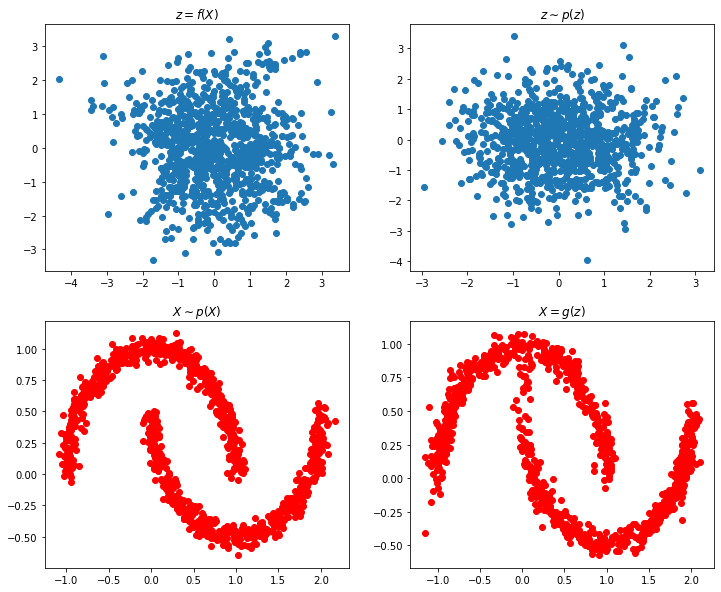

In [19]:
fig, axes = plt.subplots(2, 2, figsize = (12,10))

# sampling from the moons and applying our transformation 
noisy_moons = datasets.make_moons(n_samples=1000, noise=.05)[0].astype(np.float32)
z = model.f(torch.from_numpy(noisy_moons))[0].detach().numpy()
plt.subplot(221)
plt.scatter(z[:, 0], z[:, 1])
plt.title(r'$z = f(X)$')

# sampling from a gaussian 
z = np.random.multivariate_normal(np.zeros(2), np.eye(2), 1000)
plt.subplot(222)
plt.scatter(z[:, 0], z[:, 1])
plt.title(r'$z \sim p(z)$')

# sampling straight from the crescent moon distribution 
plt.subplot(223)
x = datasets.make_moons(n_samples=1000, noise=.05)[0].astype(np.float32)
plt.scatter(x[:, 0], x[:, 1], c='r')
plt.title(r'$X \sim p(X)$')

# sampling from our latent space and applying inverse transformation 
plt.subplot(224)
x = model.sample(1000).detach().numpy()
plt.scatter(x[:, 0, 0], x[:, 0, 1], c='r')
plt.title(r'$X = g(z)$');